In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the dataset
df = pd.read_csv('output.csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Reviews,Installs,Free,Price,Developer,Released,Last Updated,Content Rating,Ad Supported,In App Purchases
0,Red Roses Heart Keyboard Backg,com.ikeyboard.theme.red.roses.heart,PERSONALIZATION,4.900000,135.0,1.0,16741,True,0.0,Delicate theme for Android App,11-30-2020,12-01-2020,Everyone,True,NaN
1,King James Bible: U.S. version,american.king.james.version,LIBRARIES_AND_DEMO,4.500000,20.0,5.0,323,True,0.0,Kjv,01-19-2021,07-20-2022,Everyone,True,NaN
2,Love Messages for Girlfriend,mylove.lovemessages.girlfriend,SOCIAL,4.210527,516.0,5.0,401316,True,0.0,Sweet Girl Apps,12-12-2020,06-18-2023,Mature 17+,True,NaN
3,Vidmantè 2021,com.video.player.freemusicplayer2,VIDEO_PLAYERS,4.506173,9258.0,16.0,4506129,True,0.0,duriiapps,12-22-2020,10-05-2023,Everyone,True,NaN
4,Raya & The Last Dragon Wallpap,com.NewAstra.RayaandthelastdragonWallpaper,ENTERTAINMENT,4.384615,121.0,7.0,23795,True,0.0,NewAstra,04-01-2021,03-21-2022,Everyone,True,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18929 entries, 0 to 18928
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App Name          18929 non-null  object 
 1   App Id            18929 non-null  object 
 2   Category          18929 non-null  object 
 3   Rating            18920 non-null  float64
 4   Rating Count      18920 non-null  float64
 5   Reviews           18920 non-null  float64
 6   Installs          18929 non-null  int64  
 7   Free              18929 non-null  bool   
 8   Price             18928 non-null  float64
 9   Developer         18929 non-null  object 
 10  Released          18929 non-null  object 
 11  Last Updated      18929 non-null  object 
 12  Content Rating    18929 non-null  object 
 13  Ad Supported      18929 non-null  bool   
 14  In App Purchases  6151 non-null   object 
dtypes: bool(2), float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [4]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

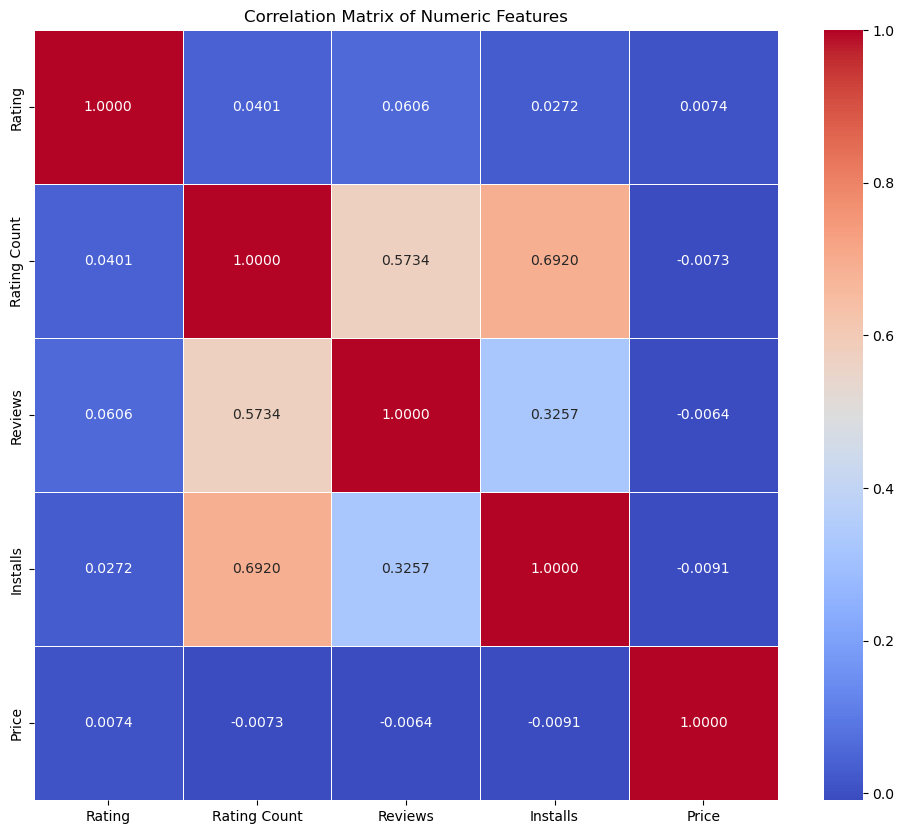

In [5]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

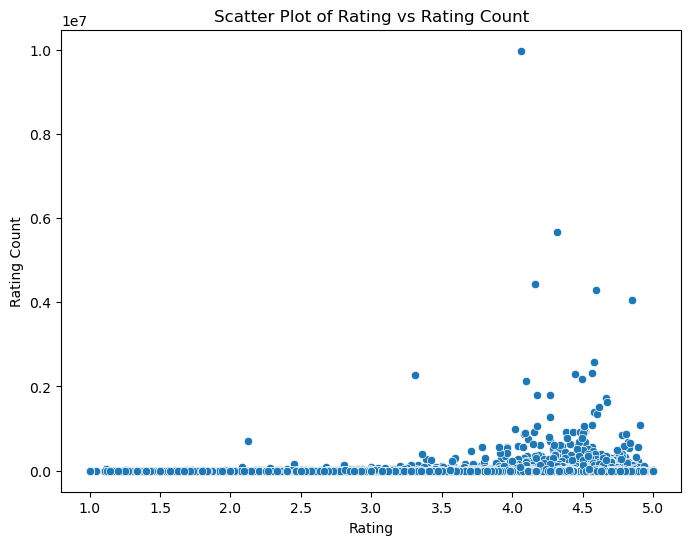

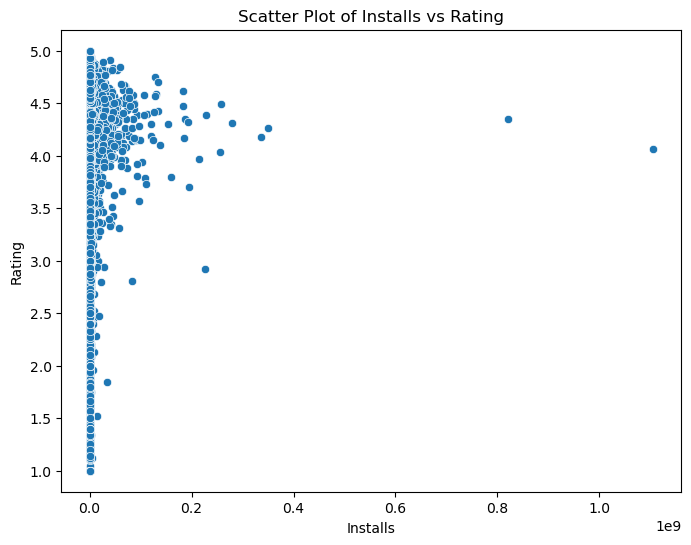

In [6]:
# Choose pairs of features for scatter plots
feature_pairs = [
    ('Rating', 'Rating Count'),
    ('Installs', 'Rating'),
    # Add more pairs as needed
]

# Create scatter plots
for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


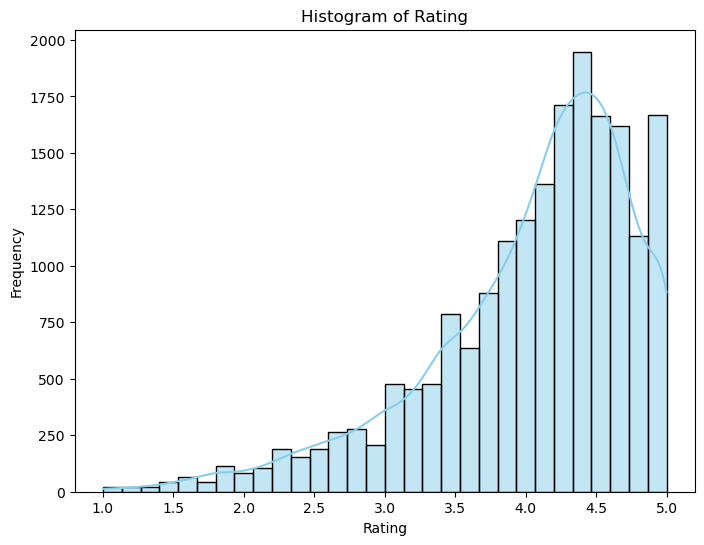

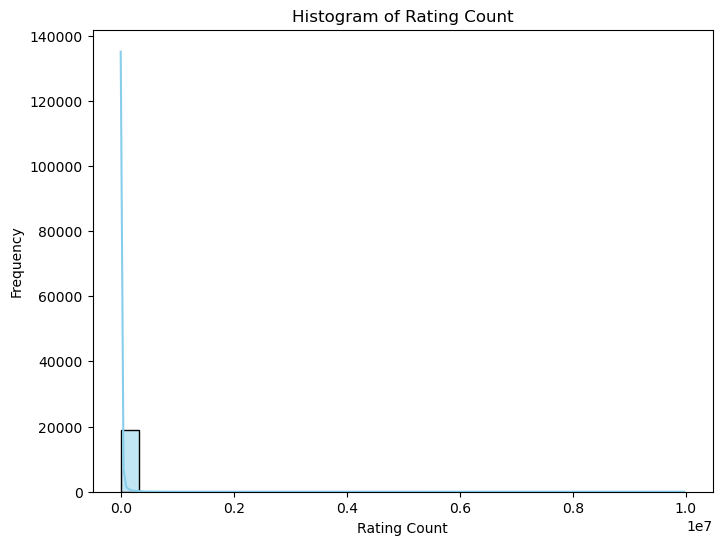

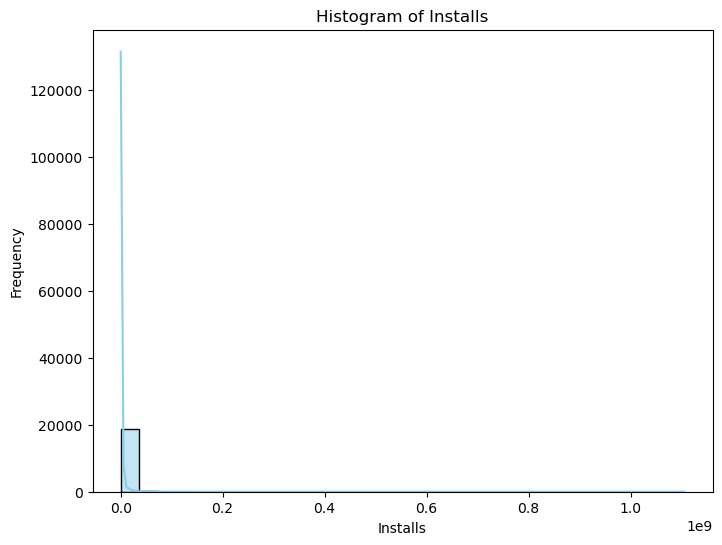

In [7]:
# Choose features for histograms
features_for_histogram = [
    'Rating',
    'Rating Count',
    'Installs'
    # Add more features as needed
]

# Create histograms
for feature in features_for_histogram:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [8]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Identify columns with missing or infinite values
columns_with_missing_values = numeric_columns.columns[numeric_columns.isnull().any() | np.isinf(numeric_columns).any()]

# Print columns with missing or infinite values
print("Columns with missing or infinite values:", columns_with_missing_values)

# Drop rows with missing or infinite values in any of the selected columns
df_cleaned = df.dropna(subset=columns_with_missing_values)
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Select only numeric columns from the cleaned DataFrame
numeric_columns_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numeric_columns_cleaned.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Regression Analysis
X = numeric_columns_cleaned.drop(columns=['Rating'])
X = sm.add_constant(X)  # add a constant term to the independent variables
y = numeric_columns_cleaned['Rating']

model = sm.OLS(y, X).fit()
print("\nRegression Summary:")
print(model.summary())

# Hypothesis Testing
print("\nHypothesis Testing:")
for column in X.columns[1:]:
    print(f"H0: {column} has no significant effect on 'Rating'")
    print(f"H1: {column} has a significant effect on 'Rating'")
    print(f"p-value for {column}: {model.pvalues[column]}")
    print()

Columns with missing or infinite values: Index(['Rating', 'Rating Count', 'Reviews', 'Price'], dtype='object')

Correlation Matrix:
                Rating  Rating Count   Reviews  Installs     Price
Rating        1.000000      0.073551  0.097605  0.062272  0.009283
Rating Count  0.073551      1.000000  0.746846  0.654404 -0.009924
Reviews       0.097605      0.746846  1.000000  0.457093 -0.008605
Installs      0.062272      0.654404  0.457093  1.000000 -0.014320
Price         0.009283     -0.009924 -0.008605 -0.014320  1.000000

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     15.76
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.78e-13
Time:                        15:43:55   Log-Likeli